# Predicting the right side of a face from the given left side
## Library imports

In [7]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt

print('TensorFlow version:', tf.__version__)
print('NumPy version: ', np.__version__)

TensorFlow version: 2.3.0
NumPy version:  1.18.5


## 1. Acquire a dataset for training
CelebA is a great dataset for all kinds of faces with different features, so it only makes sense to use for training

In [2]:
celeba_bldr = tfds.builder('celeb_a')
celeba_bldr.download_and_prepare()
celeba = celeba_bldr.as_dataset(shuffle_files=False)
print(celeba.keys())

celeba_train = celeba['train']
celeba_valid = celeba['validation']
celeba_test = celeba['test']

dict_keys(['test', 'train', 'validation'])


## 2. Define the dataset image preprocessing function
### 1. Define the function

In [33]:
def preprocess(example, size=(64, 64)):
    image = example['image']
    height, width = size
    image_cropped = tf.image.crop_to_bounding_box(
        image, offset_height=20, offset_width=0,
        target_height=178, target_width=178)
    image_resized = tf.image.resize(
        image_cropped, size=size)
    left_side = tf.image.crop_to_bounding_box(
        image_resized, offset_height=0, offset_width=0,
        target_height=height, target_width=int(width / 2))
    right_side = tf.image.crop_to_bounding_box(
        image_resized, offset_height=0, offset_width=int(width / 2),
        target_height=height, target_width=int(width / 2))
    return (left_side / 255.0, right_side / 255.0)

### 2. Check if preprocessing returns right and left halves of an image

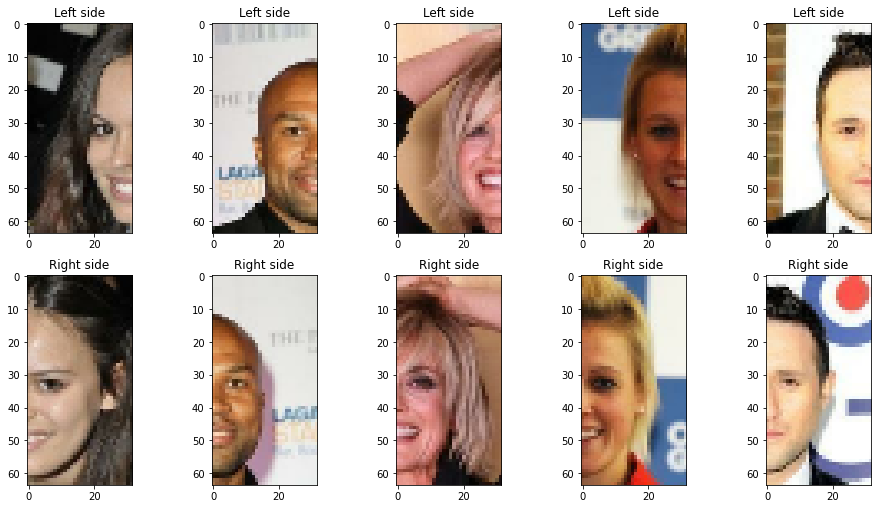

In [39]:
## Take and preprocess 5 examples:
examples = []
for example in celeba_train.take(5):
    examples.append(preprocess(example))

fig = plt.figure(figsize=(16, 8.5))

for column, (left_side, right_side) in enumerate(examples):
    ax = fig.add_subplot(2, 5, 1 + column)
    ax.set_title('Left side', size=12)
    ax.imshow(left_side)
    ax = fig.add_subplot(2, 5, 6 + column)
    ax.set_title('Right side', size=12)
    ax.imshow(right_side)